In [0]:
from IPython.display import display, Image

### 학습 내용
* 샘플의 특성이 104개인 것을 활용하여 릿지 회귀, 라쏘 회귀에 대해 알아본다.

* 릿지 회귀(Ridge Regressi
on) - L2에 대해 실습을 통해 알아본다.

* 라쏘 회귀(Lasso Regression) - L1에 대해 실습을 통해 알아본다.

* 릿지 회귀(Ridge Regression)의 alpha의 변경

* 라쏘 회귀(Lasso Regression)의 alpha의 변경

In [4]:
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# ! pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=01ebcb7bc1a615fe0d191903d711d9f605c9dedee78942d2101490c3a7a08cac
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge # 릿지회귀
import pandas as pd

In [0]:
boston = load_boston()

In [40]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [42]:
df_boston.loc[ : ,'CRIM' : 'RM']

,CRIM,ZN,INDUS,CHAS,NOX,RM
0,0.00632,18.0,2.31,0.0,0.538,6.575
1,0.02731,0.0,7.07,0.0,0.469,6.421
2,0.02729,0.0,7.07,0.0,0.469,7.185
3,0.03237,0.0,2.18,0.0,0.458,6.998
4,0.06905,0.0,2.18,0.0,0.458,7.147
5,0.02985,0.0,2.18,0.0,0.458,6.430
6,0.08829,12.5,7.87,0.0,0.524,6.012
7,0.14455,12.5,7.87,0.0,0.524,6.172
8,0.21124,12.5,7.87,0.0,0.524,5.631
9,0.17004,12.5,7.87,0.0,0.524,6.004


In [43]:
X = df_boston.loc[:, 'CRIM':'LSTAT'] # 입력 데이터
y = boston.target
print("정규화,확장 전 데이터 셋 : ", X.shape, y.shape)
normalize_X = MinMaxScaler().fit_transform(X) # 입력 데이터 정규화
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(normalize_X) # 데이터 featur
print("정규화, 추가 생성 : ", ex_X.shape, y.shape)

정규화,확장 전 데이터 셋 :  (506, 13) (506,)
정규화, 추가 생성 :  (506, 104) (506,)


In [87]:
X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.78


## 릿지 회귀 alpha = 0.01, 0.1, 1, 10

In [45]:
# 릿지 회귀 적용 : alpah = 1
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(ridge)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.87
테스트 세트 점수 : 0.81


In [47]:
# 릿지 회귀 적용 : alpah = 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.73


In [49]:
# 릿지 회귀 적용 : alpah = 0.1 ## 가장 좋은 alpha##
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.82


In [50]:
# 릿지 회귀 적용 : alpah = 0.01
ridge001 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10)
print("훈련 세트 점수 : {:.2f}".format(ridge001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge001.score(X_test, y_test)))

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.73


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Ridge alpha=10')

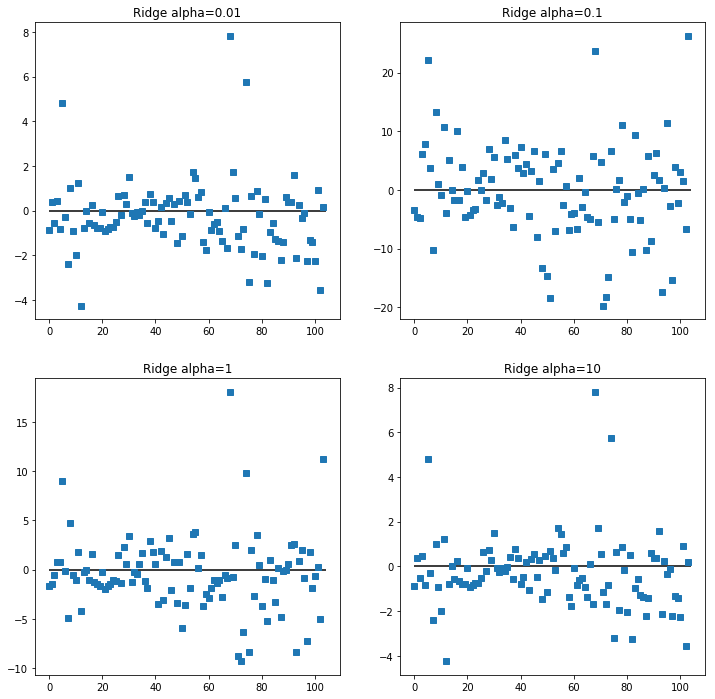

In [61]:
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 's', label="Ridge alpha=0.01")
plt.title('Ridge alpha=0.01')

plt.subplot(222)
plt.hlines(0,0, len(ridge01.coef_))
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.1")
plt.title('Ridge alpha=0.1')

plt.subplot(223)
plt.hlines(0,0, len(ridge.coef_))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.title('Ridge alpha=1')

plt.subplot(224)
plt.hlines(0,0, len(ridge10.coef_))
plt.plot(ridge10.coef_, 's', label="Ridge alpha=10")
plt.title('Ridge alpha=10')

## 라쏘 회귀

In [0]:
from sklearn.linear_model import Lasso

In [64]:
lasso = Lasso().fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

# 점수가 매우 낮다!

훈련 데이터 세트 점수 : 0.27
테스트 데이터 세트 점수 : 0.26


In [65]:
# 특성(feature)가 0이 아닌 것의 개수는?
print("사용한 특성의 수 : {:.2f}".format(np.sum(lasso.coef_ != 0)))

사용한 특성의 수 : 3.00


In [66]:
# α = 0.0001
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso00001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso00001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0))

훈련 데이터 세트 점수 :  0.9435815252488567
테스트 데이터 세트 점수 :  0.8080525356174062
사용한 특성의 수 :  95


In [68]:
# α = 0.01
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0))

훈련 데이터 세트 점수 :  0.8864717420585478
테스트 데이터 세트 점수 :  0.8036004116583616
사용한 특성의 수 :  34


In [69]:
# α = 0.1
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso01.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso01.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso01.coef_ != 0))

훈련 데이터 세트 점수 :  0.7471467575228325
테스트 데이터 세트 점수 :  0.6986891802234085
사용한 특성의 수 :  12


In [71]:
# α = 10
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso10.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso10.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso01.coef_ != 0))

훈련 데이터 세트 점수 :  0.0
테스트 데이터 세트 점수 :  -0.03189647654769301
사용한 특성의 수 :  12


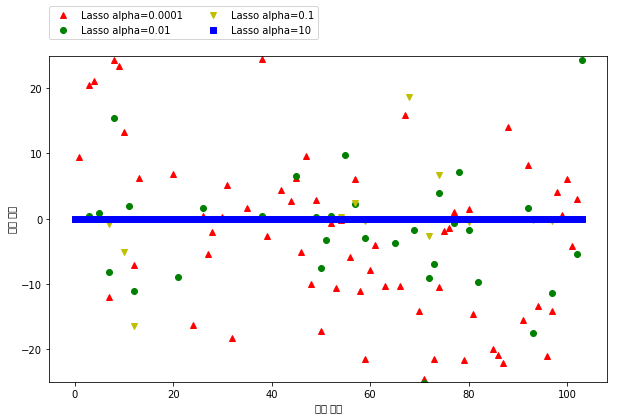

In [82]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(10,6))
plt.plot(lasso00001.coef_, "r^", label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, 'go', label="Lasso alpha=0.01")
plt.plot(lasso01.coef_, 'yv', label="Lasso alpha=0.1")
plt.plot(lasso10.coef_, "bs", label="Lasso alpha=10")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()